In [3]:
from scipy.stats import rankdata

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [6]:
filename='Downloads/Untitled spreadsheet - Sheet2.csv'


In [57]:
def significance(n,R=None,pval=None):
    crit=pd.read_csv('moore.csv',index_col=0)
    critN=crit.iloc[(np.abs(crit.index-n)).argmin()]
    
    if R is None:
        if pval is None:
            pval='0.05'
        return critN[str(pval)]
    
    else:
        return float(critN[(R-critN)>0].idxmax())    
            
        
def mooreTest(df):
    from scipy.stats import rankdata
    df=df.copy()
    df.columns=['r','a']
    df['rank']=rankdata(df.r)

#     df['cos']=np.cos(np.deg2rad(df['a']))
#     df['sin']=np.sin(np.deg2rad(df['a']))
#     df['icos']=df['rank']*df['cos']
#     df['isin']=df['rank']*df['sin']
    df['icos']=df['rank']*np.cos(np.deg2rad(df['a']))
    df['isin']=df['rank']*np.sin(np.deg2rad(df['a']))

    k=(df['rank'].max())
    X=df['icos'].sum()/k
    Y=df['isin'].sum()/k
    R=np.sqrt((X**2+Y**2)/k)    

    return significance(k,R),df,R
    

In [58]:
mooreTest(mt)

(0.001,         r      a  rank      icos      isin
 0  0.3338  171.0   1.0 -0.987688  0.156434
 1  0.3922  186.0   2.0 -1.989044 -0.209057
 2  0.4696  117.0   3.0 -1.361971  2.673020
 3  0.6962  134.0   4.0 -2.778633  2.877359
 4  0.7747  169.0   5.0 -4.908136  0.954045
 5  0.8794  140.0   6.0 -4.596267  3.856726
 6  0.8954  160.0   7.0 -6.577848  2.394141, 1.4281414230443426)

In [42]:
a='''
0.3338	171
0.3922	186
0.4696	117
0.6962	134
0.7747	169
0.8794	140
0.8954	160
'''

In [45]:
mt=pd.read_clipboard(a,)
mt=mt.T.reset_index().T.reset_index(drop=True)
mt.columns=['r','a']
mt.to_csv('mt.csv')

In [51]:
mt=pd.read_csv('mt.csv',index_col=0)

In [52]:
mt

,r,a
0,0.3338,171.0
1,0.3922,186.0
2,0.4696,117.0
3,0.6962,134.0
4,0.7747,169.0
5,0.8794,140.0
6,0.8954,160.0


In [10]:

df=pd.read_csv(filename,header=None)
df.columns=['r','a']
df['rank']=rankdata(df.r)
df

IOError: File Downloads/Untitled spreadsheet - Sheet2.csv does not exist

In [15]:
df['cos']=np.cos(np.deg2rad(df['a']))
df['sin']=np.sin(np.deg2rad(df['a']))
df['icos']=df['rank']*df['cos']
df['isin']=df['rank']*df['sin']
k=(df['rank'].max())

df

,r,a,rank,cos,sin,icos,isin
0,0.3338,171,1.0,-0.987688,0.156434,-0.987688,0.156434
1,0.3922,186,2.0,-0.994522,-0.104528,-1.989044,-0.209057
2,0.4696,117,3.0,-0.453990,0.891007,-1.361971,2.673020
3,0.6962,134,4.0,-0.694658,0.719340,-2.778633,2.877359
4,0.7747,169,5.0,-0.981627,0.190809,-4.908136,0.954045
5,0.8794,140,6.0,-0.766044,0.642788,-4.596267,3.856726
6,0.8954,160,7.0,-0.939693,0.342020,-6.577848,2.394141


KeyError: 15

In [25]:
X=df['icos'].sum()/k
Y=df['isin'].sum()/k


In [243]:
R=np.sqrt((X**2+Y**2)/k)

In [244]:
significance(k,R)

0.001

In [185]:
def critical(n,pval='0.05'):
    crit=pd.read_csv('moore.csv',index_col=0)
    return crit.iloc[(np.abs(crit.index-n)).argmin()][str(pval)]

In [238]:
significance(17)

1.031

In [236]:
significance(10,pval=0.005)

1.3130000000000002

In [242]:
significance(10,R=10)

0.001

In [186]:
crit=pd.read_csv('moore.csv',index_col=0)

critical(7)

1.055

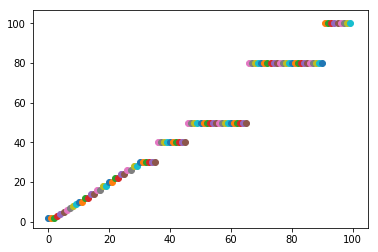

In [148]:
for i in range(100):
    
    plt.scatter(i,crit.index[(np.abs(crit.index-i)).argmin()])

In [184]:
df=pd.read_clipboard()
df.index=df['index']
df=df.drop('index',axis=1)
df.to_csv('moore.csv')
df

,0.5,0.1,0.05,0.025,0.01,0.005,0.001
index,,,,,,,
2,0.791,1.049,1.053,1.060,1.061,1.061,1.061
3,0.693,1.039,1.095,1.124,1.143,1.149,1.154
4,0.620,1.008,1.090,1.146,1.192,1.212,1.238
5,0.588,0.988,1.084,1.152,1.216,1.250,1.298
6,0.568,0.972,1.074,1.152,1.230,1.275,1.345
7,0.556,0.959,1.055,1.150,1.238,1.291,1.373
8,0.546,0.949,1.059,1.148,1.242,1.300,1.397
9,0.538,0.940,1.053,1.145,1.245,1.307,1.416
10,0.532,0.934,1.048,1.144,1.248,1.313,1.432


In [133]:
df=pd.read_clipboard()
df.index=df.reset_index()['index'].astype('int')
df=df.sort_index()
df.columns=df.iloc[0]
df=df.drop(0)

In [134]:
df.to_csv('moore.csv')

In [12]:
pd.read_csv('moore.csv',index_col=0)

,0.5,0.1,0.05,0.025,0.01,0.005,0.001
index,,,,,,,
2,0.791,1.049,1.053,1.060,1.061,1.061,1.061
3,0.693,1.039,1.095,1.124,1.143,1.149,1.154
4,0.620,1.008,1.090,1.146,1.192,1.212,1.238
5,0.588,0.988,1.084,1.152,1.216,1.250,1.298
6,0.568,0.972,1.074,1.152,1.230,1.275,1.345
7,0.556,0.959,1.055,1.150,1.238,1.291,1.373
8,0.546,0.949,1.059,1.148,1.242,1.300,1.397
9,0.538,0.940,1.053,1.145,1.245,1.307,1.416
10,0.532,0.934,1.048,1.144,1.248,1.313,1.432


,0.5,0.1,0.05,0.025,0.01,0.005,0.001
index,,,,,,,
2,0.7910,1.049,1.053,1.060,1.061,1061.000,1.061
3,0.6930,1.039,1.095,1.124,1.143,1.149,1.154
4,0.6200,1.008,1.090,1.146,1.192,1.212,1.238
5,0.5118,0.988,1.084,1.152,1.216,1.250,1.298
6,0.5680,0.972,1.074,1.152,1.230,1.275,1.345
7,0.5560,0.959,1.055,1.150,1.238,1.291,1.373
8,0.5460,0.949,1.059,1.148,1.242,1.300,1.397
9,0.5380,0.940,1.053,1.145,1.245,1.307,1.416
10,0.5320,0.934,1.048,1.144,1.248,1.313,1.432
